<a href="https://colab.research.google.com/github/KennerBenjamin/ML-Dogs_vs_Cats/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Application

Machine Learning Projekt von Benjamin Kenner und Jason Roy.

Das Projekt soll die Erklärbarkeit von Deep Learning anhand eines Katzen und Hund Classifiers aufzeigen.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

## Import des Datensatzes

Der Cats vs. Dogs Datensatz wird von Google Machine Learning Education bereitgestellt.
Hierin befinden sich Bilder von Hunden und Katzen aus verschiedensten Winkeln und teilweise mit Beschriftungen. Auf den Bilder befindet sich mindestens eine Katze bzw. ein Hund. Teilweise gibt es auch Bilder mit Katzen und Hunden in einem Bild.

Die Bilder werden über die API heruntergeladen.

In [ ]:
classes = ['cat','dog']

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('train cat images:', num_cats_tr)
print('train dog images:', num_dogs_tr)

print('val cat images:', num_cats_val)
print('val dog images:', num_dogs_val)
print("Total training images:", total_train)
print("Total validation images:", total_val)

train cat images: 1000
train dog images: 1000
val cat images: 500
val dog images: 500
Total training images: 2000
Total validation images: 1000


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
IMG_SHAPE = 150
image_gen_train = ImageDataGenerator(rescale=1./255)
train_data_gen = image_gen_train.flow_from_directory(directory=train_dir,
                                                 batch_size=5,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


### Beispielbild

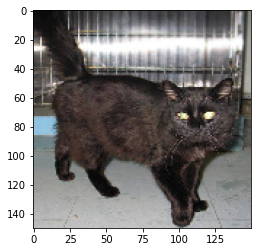

In [ ]:
image = train_data_gen[0][0][0]
plt.imshow(image)

Die geladenen Daten werden für eine bessere Generalisierbarkeit zunächst manipuliert durch:

Rotation,
verschieben in der Horizontalen,
verschieben in der Vertikalen,
verzerren durch verschieben paralleler Ränder,
Zoomen,
Rotieren.

Die entstehenden Ränder werden durch den nächsten Pixel aufgefüllt.

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Beispielbild

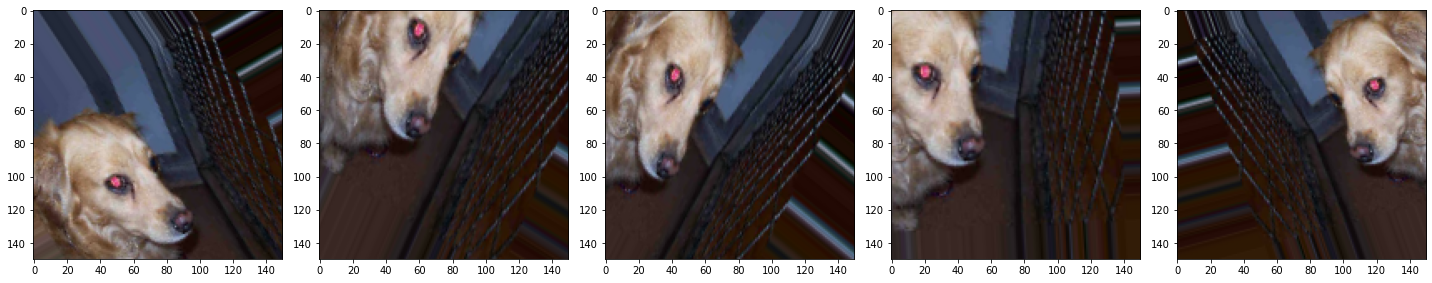

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Modeldefinition

Das CNN wird mit Keras Layern aufgebaut.

Insgesamt werden 4 Convolutional-Layers mit MaxPooling verwendet.
Es werden zunäcchst 32, dann 64, dann zweimal 128 Filter verwendet.

Bei MaxPooling wird jeweils eine Pool-Größe von 2 x 2 verwendet. Die Outputs jedes Filters werden also halbiert.

Nach der letzten MaxPooling-Layer wird eine Dropout-Layer zur Regularisierung eingebaut.

Die Ergebnisse werden durch eine Flatten-Layer eindimensional und durch eine Dense-Layer zunächst auf 512 und daraufhin auf die 2 Klassen (Katze oder Hund) reduziert.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

KeyboardInterrupt: ignored

Als Optimizer wird Adam verwendet.

Der Loss wird über die Crossentropy berechnet.

Als Metric wird die Accuracy des Models verwendet.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Das fertige CNN

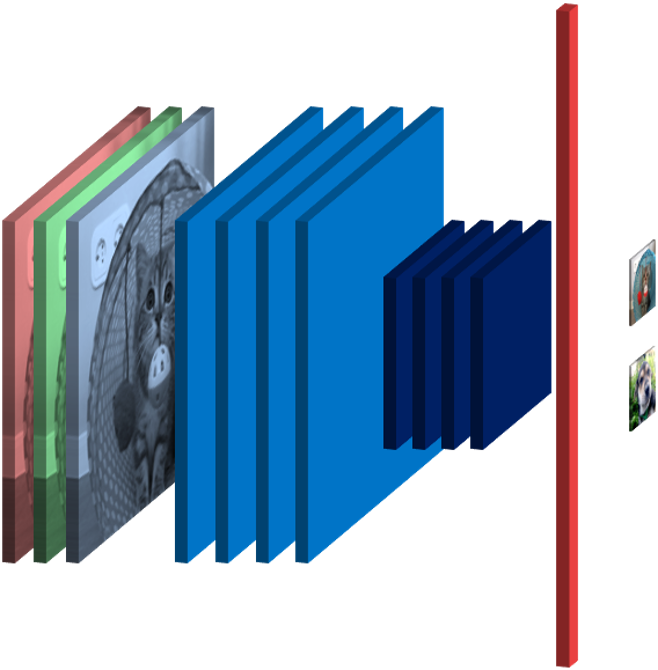



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Training

Zunächst wird ein Callback mit EarlyStopping definiert. Hierdurch wird bei einer Stagnation der Validation-Accuracy von 25 Epochen das Training beendet und das beste Model geladen.

Daraufhin wird das Model mit 200 Epochen trainiert.


In [ ]:
epochs=200
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=25,
    mode='max', restore_best_weights=True
)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks = callback
)

Epoch 1/200
20/20 [==============================] - 20s 1s/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 0.6847 - val_accuracy: 0.5020
Epoch 2/200
20/20 [==============================] - 20s 995ms/step - loss: 0.6855 - accuracy: 0.5540 - val_loss: 0.6586 - val_accuracy: 0.6040
Epoch 3/200
20/20 [==============================] - 20s 1s/step - loss: 0.6682 - accuracy: 0.5835 - val_loss: 0.6427 - val_accuracy: 0.6340
Epoch 4/200
20/20 [==============================] - 20s 1s/step - loss: 0.6618 - accuracy: 0.5975 - val_loss: 0.6420 - val_accuracy: 0.6000
Epoch 5/200
20/20 [==============================] - 20s 1s/step - loss: 0.6533 - accuracy: 0.5915 - val_loss: 0.6375 - val_accuracy: 0.5980
Epoch 6/200
20/20 [==============================] - 20s 1s/step - loss: 0.6349 - accuracy: 0.6315 - val_loss: 0.5970 - val_accuracy: 0.6880
Epoch 7/200
20/20 [==============================] - 20s 1s/step - loss: 0.6103 - accuracy: 0.6685 - val_loss: 0.6182 - val_accuracy: 0.6380
Epoch 8/20

## Ergebnisse

Die entstandene Trainigs- und Validierungsaccuracy und der Trainings- und Validierungsloss wird geplottet, um das Model auf mögliches Over- oder Underfittuing zu untersuchen.

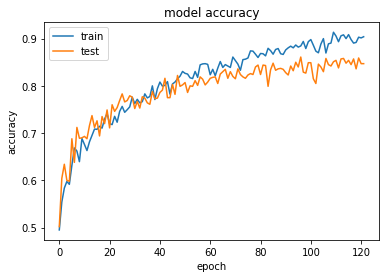

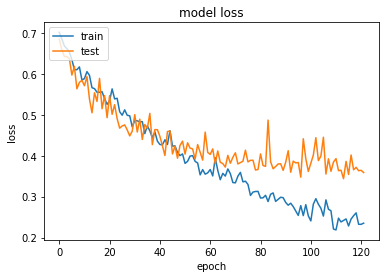

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
model.save('drive/MyDrive/Colab Notebooks/Models/cats_vs_dogs.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
model = keras.models.load_model('drive/MyDrive/Colab Notebooks/Models/cats_vs_dogs.h5')

## Explainability

Nun da ein gutes Model trainiert wurde, stelt sich die Frage, ob diese wirklich sinnvolle Entscheidungen trifft. Besteht Data-Leakage in den Daten? 

Eine sehr intuitiv auswertbare Möglichkeit das heraus zu finden ist es, die Outputs der Convolutional-Layers zu plotten. Die Filter der dieser Layers entschieden darüber welche Features eines Bildes verwendet werden. Letzendlich wird der Output der letzten Convolutional-Layer über die Klassifikation entscheiden. 

Plotten wir die Outputs dieser Filter über dem tatsächlichen Bild erkennen wir, welche Teile bzw. Pixel des Bildes von unserem Model verwendet werden, um das Bild zu klassifizieren.

In [ ]:
IMG_SHAPE = 150
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(directory=validation_dir,
                                                 batch_size=1,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
def plotPred(x,y,model):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    i = 0 
    for img, y, ax in zip(x, y, axes):
        ax.imshow(img[0])
        ax.title.set_text("y: " + classes[int(y)] + " pred: " + classes[model.predict(img).argmax()])
        i = i + 1
    plt.tight_layout()
    plt.show()

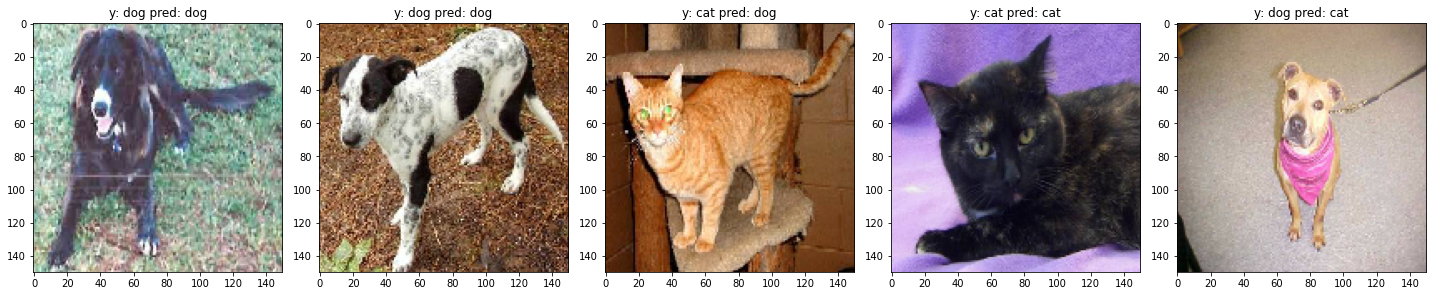

In [ ]:
x = []
y = []
for i in range(5):
  x_i, y_i = test_data_gen.next()
  x.append(x_i)
  y.append(y_i)
#x,y = test_data_gen.next()
plotPred(x,y,model)

In [ ]:
pic = 0

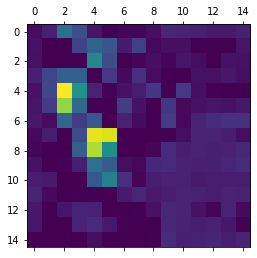

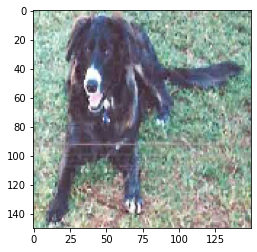

In [ ]:
import cv2
import tensorflow as tf
import keras.backend as K

img = x[pic]
label = y[pic]
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_3')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  #x,y = test_data_gen.next()
  model_out, last_conv_layer = iterate(img)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((15, 15))
plt.matshow(heatmap)
plt.show()
plt.imshow(img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


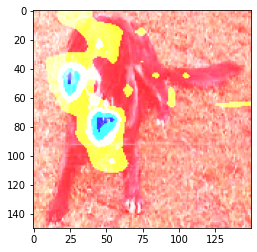

In [ ]:
img = img[0]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap_img = heatmap * 0.4 + img
plt.imshow(heatmap_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


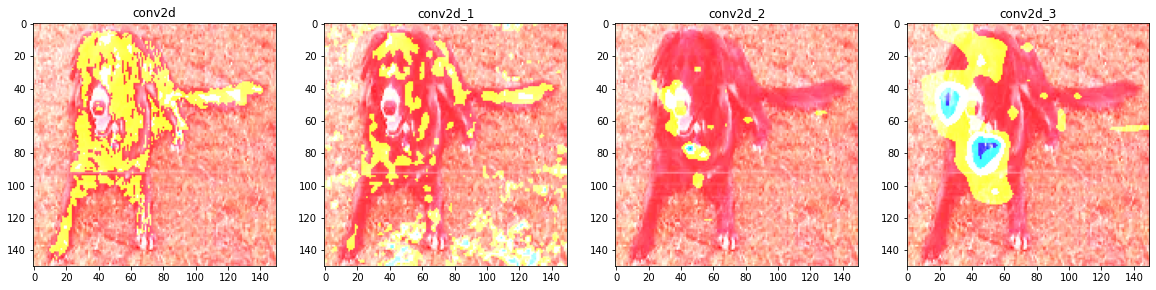

In [ ]:
import math
fig, axes = plt.subplots(1, 4, figsize=(20,20))
axes = axes.flatten()
conv_layers = ['conv2d','conv2d_1','conv2d_2','conv2d_3']
img = x[pic]
label = y[pic]
for i, layer in enumerate(conv_layers):
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(layer)
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  #x,y = test_data_gen.next()
    model_out, last_conv_layer = iterate(img)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  #rs = math.sqrt(heatmap.shape[1])
  heatmap = heatmap.reshape(heatmap.shape[1], heatmap.shape[1])
  img_0 = img[0]
  heatmap = cv2.resize(heatmap, (img_0.shape[1], img_0.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  heatmap_img = heatmap * 0.4 + img_0
  axes[i].title.set_text(layer)
  axes[i].imshow(heatmap_img)
